In [1]:
from pandas import Series, DataFrame
import pandas as pd
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/samir/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin'
import graphviz
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices
from datetime import datetime

In [3]:
happy_2020 = pd.read_csv('world_happiness_2020.csv')

happy_2020.columns = [c.replace(' ', '_') for c in happy_2020.columns]
#happy_2020.set_index('Country_name', inplace= True)
happy_2020.drop(['Unnamed:_0'],axis=1,inplace=True)
happy_2020

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


Regression Model for Happiness

In [4]:
var_names = Series(happy_2020.columns.values)
var_names

0                                   Country_name
1                             Regional_indicator
2                                   Ladder_score
3                 Standard_error_of_ladder_score
4                                   upperwhisker
5                                   lowerwhisker
6                          Logged_GDP_per_capita
7                                 Social_support
8                        Healthy_life_expectancy
9                   Freedom_to_make_life_choices
10                                    Generosity
11                     Perceptions_of_corruption
12                      Ladder_score_in_Dystopia
13              Explained_by:_Log_GDP_per_capita
14                  Explained_by:_Social_support
15         Explained_by:_Healthy_life_expectancy
16    Explained_by:_Freedom_to_make_life_choices
17                      Explained_by:_Generosity
18       Explained_by:_Perceptions_of_corruption
19                           Dystopia_+_residual
dtype: object

In [5]:
def make_vars(vars_2020):
    var_str = var_names.iloc[vars_2020].values
    s = ''
    for var in var_str:
        s = s + var + ' + '
    s = s.rstrip(' + ')
    return s

In [6]:
#Multilinear regression of Happiness with all predictors
predictors = [6,7,8,9,10,11]
pred_str = make_vars(predictors)
y, X = dmatrices('Ladder_score ~ ' + pred_str, data=happy_2020, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model
print(result.summary())

print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)


# Generosity p value too high (3.267089e-01) 9
# Perceptions of corruption p value high (7.505259e-02) 10

                            OLS Regression Results                            
Dep. Variable:           Ladder_score   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     72.36
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           2.86e-41
Time:                        16:39:45   Log-Likelihood:                -127.33
No. Observations:                 153   AIC:                             268.7
Df Residuals:                     146   BIC:                             289.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Consider removing generosity and perceptions of corruption since their p-values are too high.

In [7]:
pred_str = make_vars([6,7,8,9])

y, X = dmatrices('Ladder_score ~ ' + pred_str, data=happy_2020, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model
print(result.summary())

print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

# 1 FTMLC
# 2 SS
# 3 HLE
# 4 logged GDP/cap

#plot these top 4

                            OLS Regression Results                            
Dep. Variable:           Ladder_score   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     103.1
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           9.00e-42
Time:                        16:39:45   Log-Likelihood:                -131.02
No. Observations:                 153   AIC:                             272.0
Df Residuals:                     148   BIC:                             287.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

R^2 suffers a little.

In [8]:
#predictive model for happiness

pred_str = make_vars([6,7,8,9])

Y, X = dmatrices('Ladder_score ~ ' + pred_str, data=happy_2020, return_type='dataframe')
#y = Y['logged_num_max_increase'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


model = sm.OLS(y_train, X_train)       # Set up the model
result = model.fit()
print(result.summary())

print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:           Ladder_score   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     86.12
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           8.02e-32
Time:                        16:39:45   Log-Likelihood:                -90.475
No. Observations:                 107   AIC:                             191.0
Df Residuals:                     102   BIC:                             204.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [9]:
#RMSE on test set

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn import metrics

Xnew = X_test.values
y_pred = result.predict(Xnew)

RMSE = print(sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.5996224215367462


Regression models using happiness factors

In [10]:
confirmed = pd.read_csv('covid19_Confirmed_dataset.csv')
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


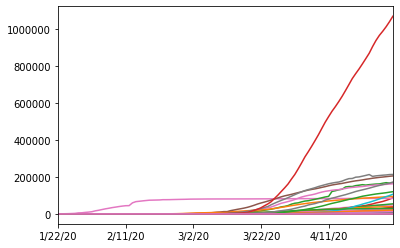

In [11]:
#Exploratory Analysis of Confirmed COVID Cases

confirmed_cleaned = confirmed.drop(['Lat','Long','Province/State'],axis=1).groupby('Country/Region').agg('sum')

for country in confirmed_cleaned.index.values:
    confirmed_cleaned.loc[country].plot()

In [12]:
## change US in covid data sets to United States or vice versa
confirmed_cleaned = confirmed_cleaned.rename(index = {'US':'United States'})

In [13]:
## Preparation for linear regression to predict highest confirmed cases spike

# Largest spike
df_max_increase = pd.DataFrame()
countries = confirmed_cleaned.index.values
max_increase = []
max_increase_date = []
for country in countries:
    max_increase.append(confirmed_cleaned.loc[country].diff().max()) #.diff()
    max_increase_date.append(confirmed_cleaned.loc[country].diff().idxmax()) #.diff()
df_max_increase['Country/Region'] = countries
df_max_increase['num_max_increase'] = max_increase
df_max_increase['date_max_increase'] = max_increase_date

df_max_increase.head()

,Country/Region,num_max_increase,date_max_increase
0,Afghanistan,232.0,4/30/20
1,Albania,34.0,4/25/20
2,Algeria,199.0,4/29/20
3,Andorra,43.0,3/27/20
4,Angola,5.0,4/18/20


In [14]:
# Merge
happy_confirmed = happy_2020.merge(df_max_increase,
                                   left_on='Country_name',
                                   right_on='Country/Region',
                                   suffixes=['_happy', '_confirmed'])

happy_confirmed

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,...,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual,Country/Region,num_max_increase,date_max_increase
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,Finland,267.0,4/4/20
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,Denmark,391.0,4/7/20
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,Switzerland,1321.0,3/23/20
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,Iceland,99.0,4/2/20
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,Norway,386.0,3/27/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,Central African Republic,31.0,4/28/20
137,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,Rwanda,22.0,4/24/20
138,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,Zimbabwe,8.0,4/30/20
139,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,South Sudan,28.0,4/28/20


In [15]:
happy_confirmed_cleaned = happy_confirmed.drop(['Standard_error_of_ladder_score','upperwhisker','lowerwhisker','Ladder_score_in_Dystopia','Explained_by:_Log_GDP_per_capita','Explained_by:_Social_support','Explained_by:_Healthy_life_expectancy','Explained_by:_Freedom_to_make_life_choices','Explained_by:_Generosity','Explained_by:_Perceptions_of_corruption','Dystopia_+_residual'],axis=1)
happy_confirmed_cleaned.corr()

,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,num_max_increase
Ladder_score,1.000000,0.782539,0.783242,0.787063,0.609026,0.099570,-0.436356,0.227834
Logged_GDP_per_capita,0.782539,1.000000,0.791659,0.860247,0.441095,-0.132541,-0.334711,0.259501
Social_support,0.783242,0.791659,1.000000,0.777790,0.487815,-0.065406,-0.224362,0.189993
Healthy_life_expectancy,0.787063,0.860247,0.777790,1.000000,0.483023,-0.098150,-0.357727,0.241400
Freedom_to_make_life_choices,0.609026,0.441095,0.487815,0.483023,1.000000,0.230694,-0.428128,0.082635
Generosity,0.099570,-0.132541,-0.065406,-0.098150,0.230694,1.000000,-0.274708,-0.008019
Perceptions_of_corruption,-0.436356,-0.334711,-0.224362,-0.357727,-0.428128,-0.274708,1.000000,-0.084871
num_max_increase,0.227834,0.259501,0.189993,0.241400,0.082635,-0.008019,-0.084871,1.000000


In [16]:
# Regression for confirmed using happiness
pred_str = make_vars([2]) #change numbers from 2, 6-11 for different happiness variables. 2, 6-9 seem to be better. 6 (Logged GDP/capita) is best.

y, X = dmatrices('num_max_increase ~ '+ pred_str, data=happy_confirmed_cleaned, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model
print(result.summary())

print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:       num_max_increase   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     7.610
Date:                Thu, 10 Sep 2020   Prob (F-statistic):            0.00659
Time:                        16:39:47   Log-Likelihood:                -1375.8
No. Observations:                 141   AIC:                             2756.
Df Residuals:                     139   BIC:                             2762.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3436.3872   1772.916     -1.938   

R^2 on these models is horrible because did not check for homoscedasticity prior to the linear regression.

Text(0, 0.5, 'num max increase')

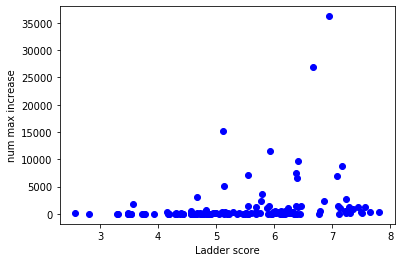

In [17]:
plot(happy_confirmed_cleaned['Ladder_score'], happy_confirmed_cleaned['num_max_increase'], marker='o', color='blue', linestyle='none')
xlabel('Ladder score')
ylabel('num max increase')
#not homoscedastic

Text(0, 0.5, 'log num max increase')

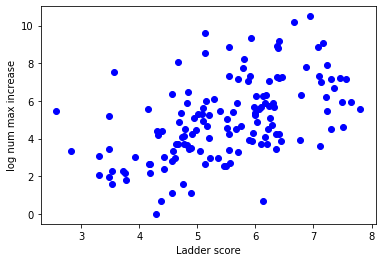

In [18]:
plot(happy_confirmed_cleaned['Ladder_score'], log(happy_confirmed_cleaned['num_max_increase']), marker='o', color='blue', linestyle='none')
xlabel('Ladder score')
ylabel('log num max increase')

In [19]:
#corrected dataset:

happy_confirmed_cleaned['log_num_max_increase'] = happy_confirmed_cleaned['num_max_increase'].apply('log')

In [20]:
happy_confirmed_cleaned.corr()

,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,num_max_increase,log_num_max_increase
Ladder_score,1.000000,0.782539,0.783242,0.787063,0.609026,0.099570,-0.436356,0.227834,0.515020
Logged_GDP_per_capita,0.782539,1.000000,0.791659,0.860247,0.441095,-0.132541,-0.334711,0.259501,0.594285
Social_support,0.783242,0.791659,1.000000,0.777790,0.487815,-0.065406,-0.224362,0.189993,0.404775
Healthy_life_expectancy,0.787063,0.860247,0.777790,1.000000,0.483023,-0.098150,-0.357727,0.241400,0.541677
Freedom_to_make_life_choices,0.609026,0.441095,0.487815,0.483023,1.000000,0.230694,-0.428128,0.082635,0.253753
Generosity,0.099570,-0.132541,-0.065406,-0.098150,0.230694,1.000000,-0.274708,-0.008019,-0.070646
Perceptions_of_corruption,-0.436356,-0.334711,-0.224362,-0.357727,-0.428128,-0.274708,1.000000,-0.084871,-0.193777
num_max_increase,0.227834,0.259501,0.189993,0.241400,0.082635,-0.008019,-0.084871,1.000000,0.588838
log_num_max_increase,0.515020,0.594285,0.404775,0.541677,0.253753,-0.070646,-0.193777,0.588838,1.000000


In [21]:
happy_confirmed_cleaned.std(axis=0)

Ladder_score                       1.126390
Logged_GDP_per_capita              1.213551
Social_support                     0.124593
Healthy_life_expectancy            6.799622
Freedom_to_make_life_choices       0.120061
Generosity                         0.145981
Perceptions_of_corruption          0.178300
num_max_increase                4311.418169
log_num_max_increase               2.132438
dtype: float64

In [22]:
# Regression for confirmed using predictors of happiness
pred_str = make_vars([2]) #change numbers from 2, 6-11 for different happiness variables. 2, 6-9 seem to be the best

Y, X = dmatrices('log_num_max_increase ~ '+ pred_str, data=happy_confirmed_cleaned, return_type='dataframe')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

model = sm.OLS(y_train, X_train)       # Set up the model
result = model.fit()
print(result.summary())

print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

                             OLS Regression Results                             
Dep. Variable:     log_num_max_increase   R-squared:                       0.243
Model:                              OLS   Adj. R-squared:                  0.235
Method:                   Least Squares   F-statistic:                     30.79
Date:                  Thu, 10 Sep 2020   Prob (F-statistic):           2.54e-07
Time:                          16:39:48   Log-Likelihood:                -196.18
No. Observations:                    98   AIC:                             396.4
Df Residuals:                        96   BIC:                             401.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1428     

In [23]:
#RMSE on test set

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn import metrics

Xnew = X_test.values
y_pred = result.predict(Xnew)

RMSE = print(sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.9117649485531152


Ladder score is a decent predictor of infection rate. Maybe a predictor of happiness could also be a good predictor of infection rate?

All predictors of happiness to create a model for predicting infection rate:

In [24]:
# Regression for confirmed using predictors of happiness
pred_str = make_vars([6,7,8,9,10,11]) #change numbers from 2, 6-11 for different happiness variables. 2, 6-9 seem to be the best

y, X = dmatrices('log_num_max_increase ~ '+ pred_str, data=happy_confirmed_cleaned, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model
print(result.summary())

print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

                             OLS Regression Results                             
Dep. Variable:     log_num_max_increase   R-squared:                       0.376
Model:                              OLS   Adj. R-squared:                  0.348
Method:                   Least Squares   F-statistic:                     13.46
Date:                  Thu, 10 Sep 2020   Prob (F-statistic):           6.55e-12
Time:                          16:39:48   Log-Likelihood:                -273.09
No. Observations:                   141   AIC:                             560.2
Df Residuals:                       134   BIC:                             580.8
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [25]:
# Regression for confirmed using predictors of happiness - GDP IS BEST
pred_str = make_vars([6]) #change numbers from 2, 6-11 for different happiness variables. 2, 6-9 seem to be the best

y, X = dmatrices('log_num_max_increase ~ '+ pred_str, data=happy_confirmed_cleaned, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model
print(result.summary())

print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

                             OLS Regression Results                             
Dep. Variable:     log_num_max_increase   R-squared:                       0.353
Model:                              OLS   Adj. R-squared:                  0.349
Method:                   Least Squares   F-statistic:                     75.90
Date:                  Thu, 10 Sep 2020   Prob (F-statistic):           7.94e-15
Time:                          16:39:48   Log-Likelihood:                -275.63
No. Observations:                   141   AIC:                             555.3
Df Residuals:                       139   BIC:                             561.2
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

Text(0.5, 1.0, 'GDP versus Max Increase of Cases')

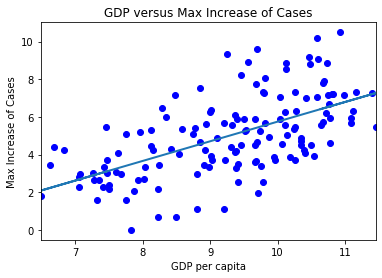

In [26]:
#Regression on full data
slope = result.params['Logged_GDP_per_capita']
intercept = result.params['Intercept']
predicted = happy_confirmed_cleaned['Logged_GDP_per_capita'] * slope + intercept
regression_predictions = Series(predicted.values, index=happy_confirmed_cleaned['Logged_GDP_per_capita'])

#Regression on GDP per capita and num_max_increase
plot(happy_confirmed_cleaned['Logged_GDP_per_capita'], (happy_confirmed_cleaned['log_num_max_increase']), marker='o', color='blue', linestyle='None')
regression_predictions.plot(label='Regression', linewidth=2)
xlabel('GDP per capita')
ylabel('Max Increase of Cases')
title('GDP versus Max Increase of Cases')

In [27]:
# Regression for confirmed using predictors of happiness - Social_support
pred_str = make_vars([7]) #change numbers from 2, 6-11 for different happiness variables. 2, 6-9 seem to be the best

y, X = dmatrices('log_num_max_increase ~ '+ pred_str, data=happy_confirmed_cleaned, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model
print(result.summary())

print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

                             OLS Regression Results                             
Dep. Variable:     log_num_max_increase   R-squared:                       0.164
Model:                              OLS   Adj. R-squared:                  0.158
Method:                   Least Squares   F-statistic:                     27.24
Date:                  Thu, 10 Sep 2020   Prob (F-statistic):           6.41e-07
Time:                          16:39:48   Log-Likelihood:                -293.73
No. Observations:                   141   AIC:                             591.5
Df Residuals:                       139   BIC:                             597.4
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.602

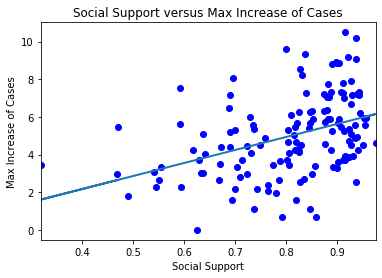

In [28]:
#Regression on full data
slope = result.params['Social_support']
intercept = result.params['Intercept']
predicted = happy_confirmed_cleaned['Social_support'] * slope + intercept
regression_predictions = Series(predicted.values, index=happy_confirmed_cleaned['Social_support'])

#Regression on GDP per capita and num_max_increase
plot(happy_confirmed_cleaned['Social_support'], (happy_confirmed_cleaned['log_num_max_increase']), marker='o', color='blue', linestyle='None')
regression_predictions.plot(label='Regression', linewidth=2)
xlabel('Social Support')
ylabel('Max Increase of Cases')
title('Social Support versus Max Increase of Cases') 
show()

In [29]:
# Regression for confirmed using predictors of happiness - Health life expectancy
pred_str = make_vars([8]) #change numbers from 2, 6-11 for different happiness variables. 2, 6-9 seem to be the best

y, X = dmatrices('log_num_max_increase ~ '+ pred_str, data=happy_confirmed_cleaned, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model
print(result.summary())

print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

                             OLS Regression Results                             
Dep. Variable:     log_num_max_increase   R-squared:                       0.293
Model:                              OLS   Adj. R-squared:                  0.288
Method:                   Least Squares   F-statistic:                     57.72
Date:                  Thu, 10 Sep 2020   Prob (F-statistic):           4.03e-12
Time:                          16:39:48   Log-Likelihood:                -281.86
No. Observations:                   141   AIC:                             567.7
Df Residuals:                       139   BIC:                             573.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

Text(0.5, 1.0, 'Life Expectancy versus Max Increase of Cases')

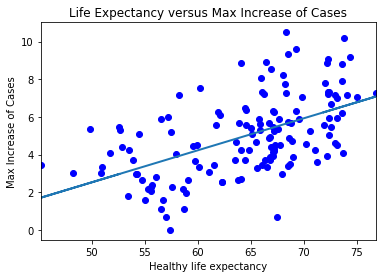

In [30]:
#Regression on full data
slope = result.params['Healthy_life_expectancy']
intercept = result.params['Intercept']
predicted = happy_confirmed_cleaned['Healthy_life_expectancy'] * slope + intercept
regression_predictions = Series(predicted.values, index=happy_confirmed_cleaned['Healthy_life_expectancy'])

#Regression on GDP per capita and num_max_increase
plot(happy_confirmed_cleaned['Healthy_life_expectancy'], (happy_confirmed_cleaned['log_num_max_increase']), marker='o', color='blue', linestyle='None')
regression_predictions.plot(label='Regression', linewidth=2)
xlabel('Healthy life expectancy')
ylabel('Max Increase of Cases')
title('Life Expectancy versus Max Increase of Cases') 

In [31]:
# Regression for confirmed using predictors of happiness - Freedom to make life choices
pred_str = make_vars([9]) #change numbers from 2, 6-11 for different happiness variables. 2, 6-9 seem to be the best

y, X = dmatrices('log_num_max_increase ~ '+ pred_str, data=happy_confirmed_cleaned, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model
print(result.summary())

print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

                             OLS Regression Results                             
Dep. Variable:     log_num_max_increase   R-squared:                       0.064
Model:                              OLS   Adj. R-squared:                  0.058
Method:                   Least Squares   F-statistic:                     9.566
Date:                  Thu, 10 Sep 2020   Prob (F-statistic):            0.00240
Time:                          16:39:49   Log-Likelihood:                -301.65
No. Observations:                   141   AIC:                             607.3
Df Residuals:                       139   BIC:                             613.2
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Freedom versus Max Increase of Cases')

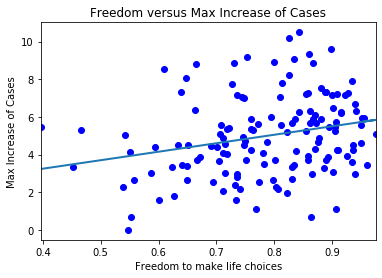

In [32]:
#Regression on full data
slope = result.params['Freedom_to_make_life_choices']
intercept = result.params['Intercept']
predicted = happy_confirmed_cleaned['Freedom_to_make_life_choices'] * slope + intercept
regression_predictions = Series(predicted.values, index=happy_confirmed_cleaned['Freedom_to_make_life_choices'])

#Regression on GDP per capita and num_max_increase
plot(happy_confirmed_cleaned['Freedom_to_make_life_choices'], (happy_confirmed_cleaned['log_num_max_increase']), marker='o', color='blue', linestyle='None')
regression_predictions.plot(label='Regression', linewidth=2)
xlabel('Freedom to make life choices')
ylabel('Max Increase of Cases')
title('Freedom versus Max Increase of Cases') 

Keep only best predictors:

In [33]:
# Regression for confirmed using predictors of happiness
pred_str = make_vars([6]) #change numbers from 2, 6-11 for different happiness variables. 2, 6-9 seem to be the best

y, X = dmatrices('log_num_max_increase ~ '+ pred_str, data=happy_confirmed_cleaned, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model
print(result.summary())

print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

                             OLS Regression Results                             
Dep. Variable:     log_num_max_increase   R-squared:                       0.353
Model:                              OLS   Adj. R-squared:                  0.349
Method:                   Least Squares   F-statistic:                     75.90
Date:                  Thu, 10 Sep 2020   Prob (F-statistic):           7.94e-15
Time:                          16:39:49   Log-Likelihood:                -275.63
No. Observations:                   141   AIC:                             555.3
Df Residuals:                       139   BIC:                             561.2
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

R^2 of 0.353 using GDP as the sole factor -- Way better!

Predictive Model:

In [34]:
# training set
pred_str = make_vars([6])

Y, X = dmatrices('log_num_max_increase ~ '+ pred_str, data=happy_confirmed_cleaned, return_type='dataframe')
#y = Y['logged_num_max_increase'].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


model = sm.OLS(y_train, X_train)       # Set up the model
result = model.fit()
print(result.summary())

print('Params')
print(result.params)
print
print('R-squared =', result.rsquared)
print('P-values')
print(result.pvalues)

                             OLS Regression Results                             
Dep. Variable:     log_num_max_increase   R-squared:                       0.317
Model:                              OLS   Adj. R-squared:                  0.310
Method:                   Least Squares   F-statistic:                     44.66
Date:                  Thu, 10 Sep 2020   Prob (F-statistic):           1.54e-09
Time:                          16:39:49   Log-Likelihood:                -191.09
No. Observations:                    98   AIC:                             386.2
Df Residuals:                        96   BIC:                             391.4
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

In [35]:
#RMSE on test set

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn import metrics

Xnew = X_test.values
y_pred = result.predict(Xnew)

RMSE = print(sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.7533624136351356


In [36]:
slope = result.params['Logged_GDP_per_capita']
intercept = result.params['Intercept']
regression_predictions = Series(y_pred,index=X_test['Logged_GDP_per_capita'])

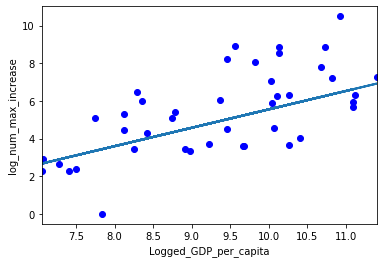

In [37]:
plot(X_test['Logged_GDP_per_capita'], (y_test['log_num_max_increase']), marker='o', color='blue', linestyle='none')
xlabel('Logged_GDP_per_capita')
ylabel('log_num_max_increase')
regression_predictions.plot(label='Regression', linewidth=2)

Predicting model without the US improves R^2 and slightly improves RMSE.
For the future: Find more outliers that have a high happiness score/GDP, but high case rate.

Implications of predictive model: A small factor in predicting how severe a spike is in a country where confirmed COVID cases is unknown or inaccurate is happiness - specifically, GDP per capita. Increasing GDP leads to more cases likely because of more testing so hard to know. 

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pred_str = make_vars([6,7,8,9])

Y, X = dmatrices('log_num_max_increase ~ 0 +'+ pred_str, data=happy_confirmed_cleaned, return_type='dataframe')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [39]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 1.4002708433867808
Root Mean Square Error: 1.7533624136351356


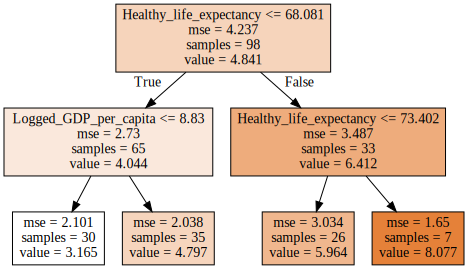

In [40]:
from sklearn import tree
dot_data = tree.export_graphviz(regressor, feature_names=list(X), class_names=sorted(Y['log_num_max_increase'].unique()), filled=True)
graphviz.Source(dot_data)